# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


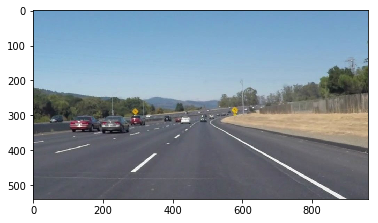

In [2]:
#reading in an image
#image = mpimg.imread('test_images/solidWhiteRight.jpg')

image = mpimg.imread('test_images/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

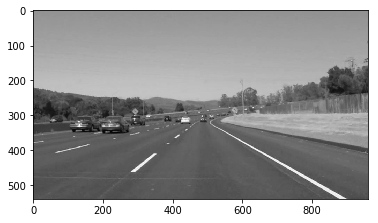

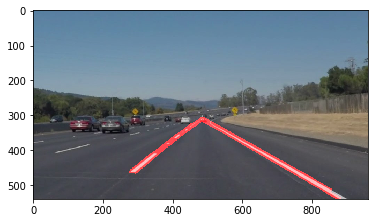

In [3]:
#
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
plt.figure()
plt.imshow(blur_gray, cmap='gray')

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 100
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

#Hough Transform to detect lines
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)

vertices = np.array([[(480,310),(500, 310), (895,539), (80, 539)]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 150    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
#lines_edges = cv2.addWeighted(color_edges, 1.0, line_image, 0.8, 0) 
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1.0, 0) 
plt.imshow(lines_edges)



## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [27]:
import math
from statistics import mean

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    left_slope = []
    left_intercept = []
    right_slope = []
    right_intercept = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            #print(x1,y1,x2,y2)
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            if slope < 0:
                left_slope.append(slope)
                left_intercept.append(intercept)
                
            else:
                right_slope.append(slope)
                right_intercept.append(intercept)
            
            #print(slope, intercept)
            #print(intercept)
            
            #cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    
    avg_left_slope = mean(left_slope)
    avg_right_slope = mean(right_slope)
    
    avg_left_intercept = mean(left_intercept)
    avg_right_intercept = mean(right_intercept)
    
    #print(avg_left_slope,avg_right_slope)
    #print(avg_left_intercept,avg_right_intercept)
    #print(image.shape)
    
   
    y1 = image.shape[0]-1
    y2 = int(y1*0.60)
    
    left_x1 = int((y1 - avg_left_intercept) / avg_left_slope)
    right_x1 = int((y1 - avg_right_intercept) / avg_right_slope)

    left_x2 = int((y2 - avg_left_intercept) / avg_left_slope)
    right_x2 = int((y2 - avg_right_intercept) / avg_right_slope)
    
    print(left_x1,y1, left_x2,y2, right_x1, y1, right_x2, y2)
    cv2.line(img, (left_x1, y1), (left_x2, y2), color, thickness)
    cv2.line(img, (right_x1, y1), (right_x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [5]:
import os
os.listdir("test_images/")
print(os.getcwd())
print(os.listdir(os.getcwd()))

/src
['.git', '.ipynb_checkpoints', 'examples', 'P1 - Copy.ipynb', 'P1.ipynb', 'README.md', 'test_images', 'test_images_bak', 'test_videos', 'test_videos_output', 'writeup_template.md']


## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

test_images/solidWhiteCurve.jpg
186 539 460 323 886 539 505 323
test_images/solidWhiteRight.jpg
151 539 457 323 840 539 504 323
test_images/solidYellowCurve.jpg
169 539 461 323 850 539 497 323
test_images/solidYellowCurve2.jpg
168 539 460 323 869 539 498 323
test_images/solidYellowLeft.jpg
146 539 455 323 847 539 509 323
test_images/whiteCarLaneSwitch.jpg
186 539 468 323 874 539 505 323


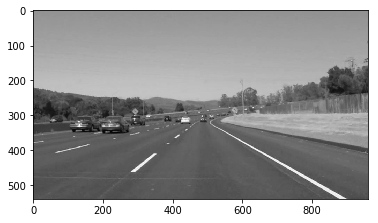

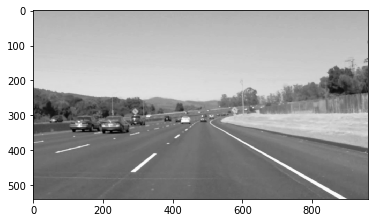

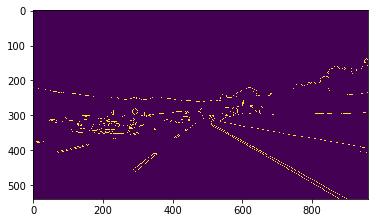

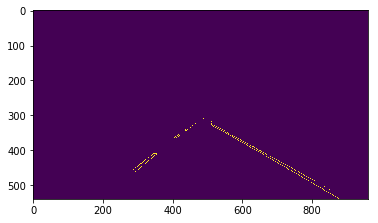

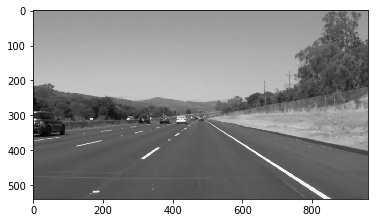

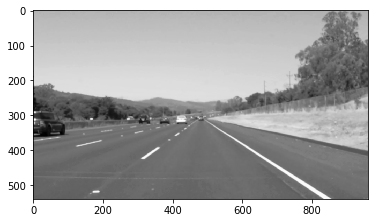

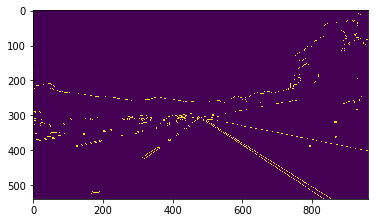

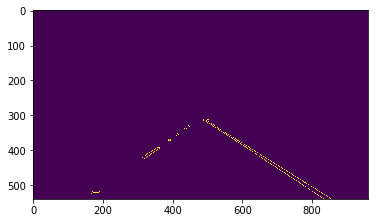

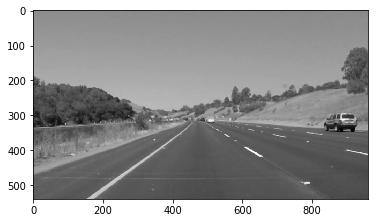

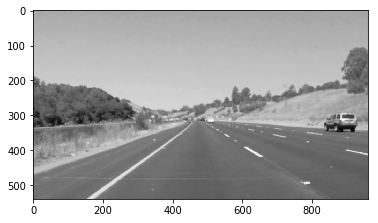

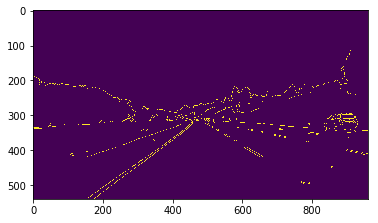

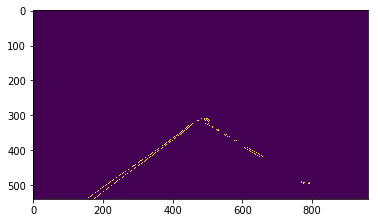

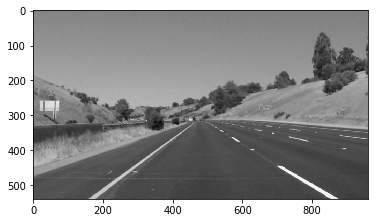

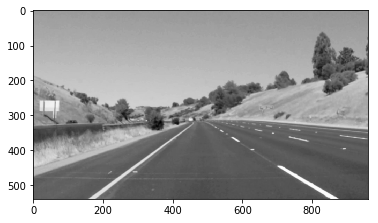

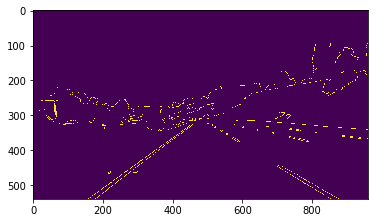

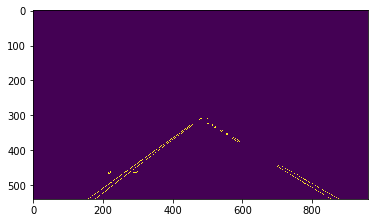

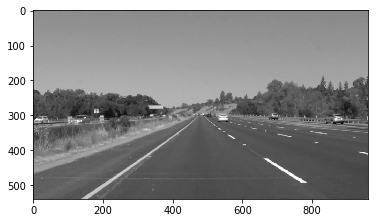

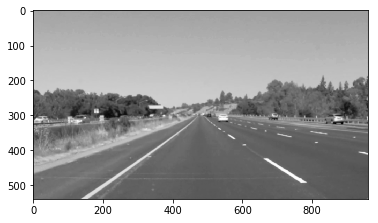

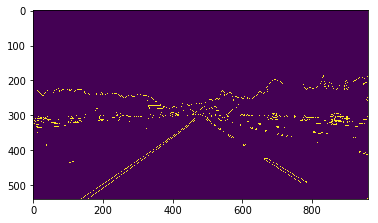

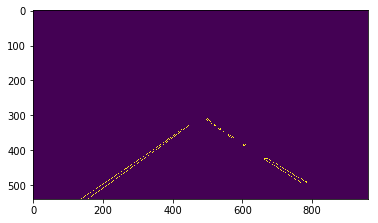

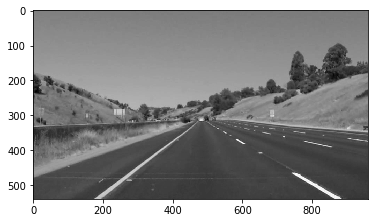

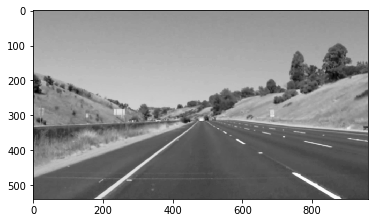

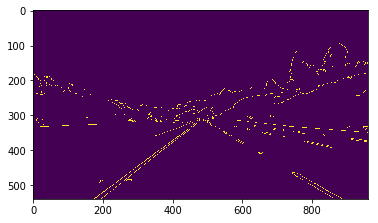

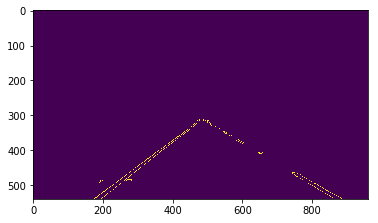

In [32]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

image_list = os.listdir("test_images/")

#For every image in the folder

for img_file in image_list:
    img_file_name = "test_images/" + img_file
    print(img_file_name)
    img_out_file_name = "test_images/" + "out_"+ img_file 
    img = mpimg.imread(img_file_name)
    result_image = process_image(img)
    #plt.figure()
    #plt.imshow(result_image)
    
    converted_result = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(img_out_file_name,converted_result)
    
    #plt.imsave(img_out_file_name,result_image)
    
    #save the image






## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [30]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    #Convert to GrayScale
    gray_image = grayscale(image)
    plt.figure()
    plt.imshow(gray_image,cmap='gray')
    
    #Gaussian Blur
    kernel_size = 5
    gaussian_gray_image = gaussian_blur(gray_image, kernel_size)
    plt.figure()
    plt.imshow(gaussian_gray_image,cmap='Greys_r')
    
    #Detect Edges
    low_threshold = 100
    high_threshold = 150
    edge_image = canny(gaussian_gray_image, low_threshold, high_threshold)
    plt.figure()
    plt.imshow(edge_image)
    
    
    #Identify region of interest
    vertices = np.array([[(480,310),(500, 310), (895,539), (80, 539)]], dtype=np.int32)
    region_edge_image = region_of_interest(edge_image, vertices)
    plt.figure()
    plt.imshow(region_edge_image)
    
    #Detect Lines
    rho = 1
    theta = np.pi/180
    threshold = 25
    min_line_len = 5
    max_line_gap = 150
    line_image = hough_lines(region_edge_image, rho, theta, threshold, min_line_len, max_line_gap)
    
       
    #Superimpose on actual image
    result = weighted_img(line_image, image, 0.7, β=1., λ=0.)
    
    
    
    
    return result

Let's try the one with the solid white lane on the right first ...

In [25]:
white_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidYellowLeft.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

118 539 460 323 825 539 512 323
[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


  1%|          | 4/682 [00:00<00:25, 26.14it/s]

118 539 460 323 825 539 512 323
120 539 461 323 831 539 515 323
116 539 465 323 829 539 514 323
119 539 461 323 830 539 512 323
124 539 463 323 832 539 514 323


  1%|          | 7/682 [00:00<00:26, 25.48it/s]

128 539 465 323 832 539 512 323
125 539 465 323 832 539 513 323
128 539 464 323 832 539 516 323
129 539 466 323 838 539 515 323
127 539 465 323 840 539 512 323
139 539 462 323 842 539 

  2%|▏         | 11/682 [00:00<00:25, 26.59it/s]

515 323
129 539 458 323 847 539 515 323

  2%|▏         | 15/682 [00:00<00:23, 28.63it/s]


134 539 460 323 845 539 518 323
133 539 466 323 844 539 514 323
140 539 465 323 850 539 511 323
140 539 460 323 853 539 510 323
141 539 458 323 849 539 513 323
147 539 455 323 853 539 511 323
143 539 458 323 841 539 515 323


  3%|▎         | 23/682 [00:00<00:21, 31.05it/s]

143 539 458 323 846 539 514 323
143 539 457 323 844 539 515 323
145 539 455 323 854 539 514 323
142 539 455 323 849 539 517 323
140 539 455 323 850 539 516 323
143 539 457 323 852 539 514 323
148 539 459 323 854 539 513 323


  5%|▍         | 31/682 [00:01<00:20, 31.82it/s]

150 539 458 323 854 539 515 323
151 539 457 323 862 539 511 323
148 539 457 323 863 539 514 323
145 539 457 323 867 539 519 323
149 539 456 323 857 539 519 323
158 539 455 323 865 539 519 323


  5%|▌         | 35/682 [00:01<00:20, 31.00it/s]

160 539 454 323 858 539 521 323
154 539 455 323 875 539 514 323
160 539 451 323 864 539 519 323
159 539 455 323 876 539 514 323
154 539 453 323 862 539 521 323
157 539 451 323 867 539 519 323


  6%|▌         | 39/682 [00:01<00:20, 31.82it/s]

152 539 451 323 873 539 519 323
151 539 450 323 874 539 512 323
150 539 449 323 879 539 513 323
150 539 449 323 874 539 520 323
157 539 449 323 869 539 523 323


  7%|▋         | 46/682 [00:01<00:35, 17.81it/s]

153 539 448 323 865 539 518 323
152 539 451 323 859 539 518 323
152 539 450 323 854 539 517 323
153 539 451 323 854 539 518 323
153 539 451 323 862 539 514 323
153 539 451 323 865 539 513 323


  7%|▋         | 51/682 [00:02<00:44, 14.30it/s]

151 539 449 323 868 539 514 323
150 539 449 323 869 539 515 323
151 539 449 323 864 539 516 323


  8%|▊         | 55/682 [00:02<00:51, 12.24it/s]

150 539 450 323 868 539 515 323
155 539 450 323 870 539 512 323
152 539 450 323 858 539 512 323


  8%|▊         | 57/682 [00:02<00:56, 11.10it/s]

153 539 449 323 855 539 514 323
154 539 449 323 845 539 516 323


  9%|▊         | 59/682 [00:03<00:54, 11.34it/s]

158 539 451 323 840 539 514 323
154 539 449 323 865 539 509 323
152 539 451 323 851 539 513 323


  9%|▉         | 61/682 [00:03<00:59, 10.38it/s]

150 539 454 323 849 539 514 323
143 539 448 323 855 539 512 323
138 539 452 323 866 539 506 323


 10%|▉         | 65/682 [00:03<00:59, 10.29it/s]

144 539 449 323 863 539 509 323
142 539 452 323 856 539 511 323


 10%|▉         | 67/682 [00:03<00:56, 10.79it/s]

143 539 450 323 851 539 512 323
146 539 451 323 859 539 509 323
145 539 450 323 841 539 508 323


 10%|█         | 69/682 [00:04<01:01,  9.90it/s]

144 539 450 323 848 539 511 323
147 539 454 323 836 539 512 323


 10%|█         | 71/682 [00:04<00:59, 10.24it/s]

145 539 454 323 842 539 512 323
147 539 454 323 838 539 515 323


 11%|█         | 73/682 [00:04<01:04,  9.49it/s]

150 539 454 323 822 539 514 323
146 539 455 323 848 539 511 323
148 539 453 323 842 539 512 323


 11%|█▏        | 77/682 [00:04<00:59, 10.24it/s]

147 539 454 323 848 539 509 323
145 539 455 323 847 539 508 323


 12%|█▏        | 79/682 [00:05<00:54, 11.01it/s]

149 539 455 323 842 539 507 323
150 539 457 323 845 539 508 323
147 539 452 323 848 539 511 323


 12%|█▏        | 83/682 [00:05<00:52, 11.48it/s]

148 539 452 323 840 539 510 323
145 539 449 323 839 539 512 323
144 539 452 323 838 539 512 323


 12%|█▏        | 85/682 [00:05<00:55, 10.76it/s]

147 539 452 323 847 539 510 323
145 539 451 323 838 539 512 323


 13%|█▎        | 87/682 [00:05<00:51, 11.59it/s]

145 539 451 323 829 539 513 323
143 539 454 323 848 539 508 323
140 539 451 323 844 539 508 323


 13%|█▎        | 91/682 [00:06<00:50, 11.80it/s]

138 539 453 323 847 539 509 323
139 539 452 323 848 539 508 323
140 539 454 323 837 539 509 323
142 539 456 323 842 539 509 323
143 539 456 323 839 539 506 323


 14%|█▍        | 95/682 [00:06<00:54, 10.80it/s]

144 539 459 323 817 539 508 323
145 539 459 323 833 539 504 323
152 539 461 323 809 539 507 323


 15%|█▍        | 99/682 [00:06<00:51, 11.22it/s]

145 539 459 323 819 539 506 323
147 539 458 323 835 539 507 323
147 539 459 323 832 539 507 323


 15%|█▍        | 101/682 [00:07<00:55, 10.55it/s]

148 539 459 323 829 539 508 323
147 539 459 323 831 539 505 323


 15%|█▌        | 103/682 [00:07<00:52, 11.09it/s]

145 539 460 323 825 539 510 323
143 539 457 323 837 539 506 323
143 539 457 323 828 539 508 323


 16%|█▌        | 107/682 [00:07<00:47, 12.16it/s]

142 539 455 323 833 539 503 323
140 539 457 323 834 539 512 323
142 539 456 323 843 539 511 323
143 539 457 323 831 539 508 323


 16%|█▋        | 111/682 [00:07<00:43, 13.25it/s]

143 539 457 323 836 539 508 323
144 539 458 323 841 539 506 323
138 539 461 323 834 539 509 323
143 539 460 323 841 539 506 323


 17%|█▋        | 115/682 [00:08<00:42, 13.34it/s]

147 539 460 323 841 539 507 323
146 539 460 323 840 539 507 323
154 539 454 323 842 539 508 323


 17%|█▋        | 117/682 [00:08<00:45, 12.36it/s]

148 539 460 323 852 539 509 323
146 539 460 323 840 539 509 323
142 539 456 323 848 539 510 323


 17%|█▋        | 119/682 [00:08<00:41, 13.49it/s]

149 539 460 323 841 539 506 323
150 539 457 323 835 539 511 323
151 539 457 323 841 539 509 323


 18%|█▊        | 123/682 [00:08<00:40, 13.76it/s]

146 539 457 323 843 539 510 323
149 539 456 323 846 539 509 323
148 539 459 323 844 539 506 323


 19%|█▊        | 127/682 [00:09<00:40, 13.81it/s]

148 539 456 323 849 539 507 323
150 539 455 323 848 539 507 323
147 539 460 323 848 539 508 323
150 539 460

 19%|█▉        | 129/682 [00:09<00:43, 12.71it/s]

 323 849 539 508 323
150 539 460 323 844 539 507 323
149 539 460 323 846 539 504 323


 19%|█▉        | 131/682 [00:09<00:40, 13.63it/s]

148 539 460 323 846 539 509 323
148 539 460 323 844 539 508 323
148 539 459 323 847 539 507 323


 20%|█▉        | 135/682 [00:09<00:39, 13.81it/s]

153 539 460 323 847 539 508 323
148 539 461 323 844 539 508 323
152 539 461 323 844 539 508 323


 20%|██        | 139/682 [00:09<00:39, 13.87it/s]

151 539 457 323 847 539 505 323
149 539 461 323 841 539 509 323
152 539 460 323 844 539 508 323


 21%|██        | 141/682 [00:10<00:45, 11.93it/s]

148 539 459 323 850 539 504 323
149 539 460 323 850 539 504 323
152 539 458 323 850 539 504 323


 21%|██▏       | 145/682 [00:10<00:42, 12.69it/s]

150 539 460 323 863 539 457 323
152 539 458 323 856 539 501 323
147 539 461 323 848 539 505 323


 22%|██▏       | 147/682 [00:10<00:38, 13.74it/s]

150 539 460 323 852 539 504 323
154 539 461 323 847 539 507 323
147 539 459 323 859 539 503 323


 22%|██▏       | 151/682 [00:10<00:38, 13.92it/s]

150 539 460 323 859 539 503 323
144 539 459 323 859 539 502 323
157 539 461 323 855 539 507 323
155 539 463 323 857 539 501 323


 23%|██▎       | 155/682 [00:11<00:37, 13.99it/s]

154 539 461 323 853 539 502 323
157 539 463 323 855 539 502 323
154 539 463 323 852 539 501 323
159 539 469 323 852 539 501 323


 23%|██▎       | 159/682 [00:11<00:36, 14.31it/s]

154 539 470 323 856 539 499 323
159 539 467 323 856 539 503 323
162 539 469 323 858 539 498 323
162 539 469 323 861 539 498 323


 24%|██▍       | 163/682 [00:11<00:36, 14.29it/s]

161 539 466 323 856 539 501 323
161 539 469 323 857 539 503 323
164 539 465 323 863 539 498 323
160 539 469 323 869 539 500 323


 24%|██▍       | 167/682 [00:11<00:35, 14.57it/s]

164 539 468 323 866 539 499 323
161 539 468 323 871 539 499 323
165 539 468 323 869 539 502 323
166 539 468 323 869 539 505 323


 25%|██▌       | 171/682 [00:12<00:34, 14.68it/s]

164 539 469 323 870 539 429 323
166 539 468 323 872 539 504 323
168 539 469 323 872 539 506 323
169 539 470 323 873 539 506 323


 26%|██▌       | 175/682 [00:12<00:37, 13.46it/s]

177 539 465 323 875 539 503 323
177 539 464 323 876 539 508 323
172 539 465 323 879 539 508 323


 26%|██▌       | 177/682 [00:12<00:42, 11.86it/s]

175 539 466 323 880 539 508 323
181 539 469 323 880 539 510 323


 26%|██▌       | 179/682 [00:12<00:40, 12.33it/s]

178 539 465 323 885 539 508 323
181 539 467 323 875 539 510 323
178 539 466 323 883 539 502 323


 27%|██▋       | 181/682 [00:13<00:45, 11.06it/s]

175 539 466 323 882 539 499 323
180 539 463 323 877 539 505 323
179 539 462 323 892 539 503 323


 27%|██▋       | 185/682 [00:13<00:46, 10.78it/s]

177 539 465 323 885 539 502 323
183 539 465 323 896 539 499 323


 27%|██▋       | 187/682 [00:13<00:43, 11.43it/s]

182 539 464 323 889 539 499 323
183 539 463 323 883 539 501 323
180 539 464 323 894 539 497 323


 28%|██▊       | 189/682 [00:13<00:46, 10.58it/s]

180 539 463 323 884 539 500 323
184 539 464 323 891 539 496 323
183 539 464 323 881 539 501 323


 28%|██▊       | 193/682 [00:14<00:48, 10.08it/s]

184 539 464 323 884 539 501 323
185 539 460 323 880 539 502 323


 29%|██▊       | 195/682 [00:14<00:44, 10.86it/s]

181 539 462 323 885 539 499 323
182 539 462 323 885 539 501 323
182 539 462 323 881 539 500 323


 29%|██▉       | 197/682 [00:14<00:46, 10.33it/s]

180 539 461 323 881 539 499 323
183 539 463 323 879 539 499 323
179 539 461 323 882 539 498 323


 29%|██▉       | 201/682 [00:15<00:45, 10.56it/s]

177 539 458 323 879 539 496 323
175 539 457 323 876 539 495 323


 30%|██▉       | 203/682 [00:15<00:42, 11.21it/s]

175 539 457 323 873 539 501 323
186 539 455 323 878 539 496 323
175 539 457 323 876 539 494 323


 30%|███       | 205/682 [00:15<00:46, 10.35it/s]

178 539 459 323 874 539 493 323
181 539 462 323 871 539 497 323
175

 30%|███       | 207/682 [00:15<00:47, 10.05it/s]

 539 460 323 871 539 493 323
175 539 459 323 874 539 492 323


 31%|███       | 209/682 [00:15<00:48,  9.68it/s]

177 539 459 323 872 539 495 323
172 539 461 323 868 539 494 323
168 539 461 323 870 539 482 323


 31%|███       | 211/682 [00:16<00:44, 10.56it/s]

168 539 459 323 869 539 494 323
166 539 460 323 862 539 494 323


 32%|███▏      | 215/682 [00:16<00:44, 10.55it/s]

164 539 459 323 868 539 494 323
159 539 464 323 868 539 494 323
162 539 461 323 859 539 494 323


 32%|███▏      | 219/682 [00:16<00:41, 11.18it/s]

165 539 459 323 860 539 493 323
161 539 459 323 858 539 493 323
165 539 459 323 858 539 495 323
170 539 459 323 864 539 493 323
165 539 458 323 859 539 494 323


 33%|███▎      | 223/682 [00:18<01:36,  4.77it/s]

163 539 459 323 858 539 496 323
162 539 463 323 861 539 492 323
163 539 459 323 853 539 499 323


 33%|███▎      | 225/682 [00:18<01:21,  5.59it/s]

163 539 459 323 857 539 498 323
163 539 459 323 863 539 494 323
161 539 455 323 863 539 499 323


 34%|███▎      | 229/682 [00:18<01:01,  7.40it/s]

164 539 458 323 862 539 501 323
163 539 458 323 855 539 505 323


 34%|███▍      | 231/682 [00:19<00:53,  8.45it/s]

160 539 457 323 863 539 501 323
156 539 458 323 860 539 494 323
156 539 459 323 858 539 503 323


 34%|███▍      | 233/682 [00:19<00:53,  8.37it/s]

155 539 458 323 855 539 501 323
155 539 459 323 853 539 500 323
154 539 459 323 853 539 499 323


 35%|███▍      | 237/682 [00:19<00:47,  9.27it/s]

153 539 458 323 859 539 503 323
153 539 457 323 860 539 502 323


 35%|███▌      | 239/682 [00:19<00:43, 10.25it/s]

151 539 455 323 855 539 507 323
152 539 459 323 864 539 504 323
157 539 457 323 861 539 503 323


 36%|███▌      | 243/682 [00:20<00:40, 10.92it/s]

152 539 457 323 860 539 503 323
148 539 461 323 869 539 503 323
151 539 460 323 866 539 501 323


 36%|███▌      | 245/682 [00:20<00:41, 10.50it/s]

150 539 460 323 869 539 499 323
153 539 461 323 864 539 498 323


 36%|███▌      | 247/682 [00:20<00:37, 11.45it/s]

152 539 461 323 852 539 500 323
163 539 461 323 856 539 498 323
154 539 461 323 851 539 499 323


 37%|███▋      | 251/682 [00:20<00:37, 11.62it/s]

154 539 460 323 862 539 497 323
151 539 460 323 857 539 497 323
152 539 460 323 864 539 495 323


 37%|███▋      | 253/682 [00:21<00:37, 11.32it/s]

150 539 460 323 853 539 499 323
149 539 462 323 854 539 495 323
148 539 462 323 850 539 497 323


 37%|███▋      | 255/682 [00:21<00:33, 12.62it/s]

159 539 462 323 853 539 496 323
154 539 489 323 853 539 496 323
158 539 458 323 854 539 497 323


 38%|███▊      | 259/682 [00:21<00:31, 13.47it/s]

160 539 458 323 879 539 493 323
161 539 458 323 864 539 497 323
161 539 457 323 850 539 500 323
163

 39%|███▊      | 263/682 [00:21<00:29, 13.98it/s]

 539 458 323 853 539 500 323
162 539 459 323 852 539 500 323
163 539 458 323 854 539 497 323
158 539 460 323 856 539 500 323


 39%|███▉      | 267/682 [00:22<00:28, 14.34it/s]

159 539 460 323 855 539 503 323
160 539 460 323 852 539 502 323
159 539 461 323 864 539 501 323
156 539 460 323 860 539 503 323


 40%|███▉      | 271/682 [00:22<00:28, 14.39it/s]

158 539 462 323 863 539 502 323
159 539 462 323 867 539 497 323
155 539 460 323 878 539 497 323
164 539 461 323 872 539 501 323


 40%|████      | 275/682 [00:22<00:28, 14.34it/s]

162 539 464 323 866 539 502 323
163 539 466 323 875 539 497 323
161 539 464 323 870 539 499 323
162 539 463 323 882 539 499 323


 41%|████      | 279/682 [00:22<00:28, 14.29it/s]

161 539 463 323 874 539 502 323
159 539 462 323 869 539 502 323
159 539 461 323 870 539 498 323
163 539 465 323 868 539 498 323


 41%|████▏     | 283/682 [00:23<00:27, 14.43it/s]

164 539 465 323 870 539 492 323
165 539 469 323 908 539 483 323
163 539 465 323 1040 539 408 323
170 539 463 323 995 539 421 323


 42%|████▏     | 287/682 [00:23<00:27, 14.36it/s]

166 539 461 323 932 539 453 323
165 539 460 323 1005 539 395 323
161 539 462 323 936 539 437 323
163 539 463 323 927 539 411 323


 43%|████▎     | 291/682 [00:23<00:28, 13.65it/s]

145 539 495 323 953 539 322 323
166 539 468 323 945 539 283 323
165 539 467 323 878 539 286 323


 43%|████▎     | 293/682 [00:23<00:30, 12.76it/s]

161 539 492 323 872 539 273 323
168 539 462 323 856 539 490 323
167 539 466 323 855 539 490 323


 44%|████▎     | 297/682 [00:24<00:27, 14.02it/s]

166 539 462 323 849 539 495 323
166 539 462 323 851 539 496 323
164 539 461 323 846 539 501 323
164 539 465 323 846 539 500 323


 44%|████▍     | 301/682 [00:24<00:26, 14.17it/s]

164 539 462 323 854 539 489 323
169 539 465 323 852 539 495 323
169 539 461 323 858 539 490 323
167 539 463 323 859 539 490 323


 45%|████▍     | 305/682 [00:24<00:26, 14.32it/s]

164 539 461 323 859 539 493 323
161 539 459 323 849 539 497 323
160 539 458 323 854 539 499 323
161 539 458 323 843 539 507 323


 45%|████▌     | 307/682 [00:27<02:23,  2.62it/s]

159 539 457 323 849 539 499 323
160 539 457 323 852 539 501 323
159 539 456 323 861 539 502 323


 45%|████▌     | 309/682 [00:27<01:50,  3.39it/s]

158 539 456 323 864 539 501 323
155 539 458 323 853 539 502 323


 46%|████▌     | 313/682 [00:27<01:12,  5.10it/s]

153 539 457 323 852 539 503 323
154 539 457 323 855 539 502 323
155 539 458 323 853 539 501 323


 46%|████▌     | 315/682 [00:27<01:04,  5.71it/s]

154 539 458 323 854 539 502 323
155 539 458 323 860 539 496 323
160 539 456 323 865 539 495 323


 47%|████▋     | 319/682 [00:28<00:49,  7.38it/s]

148 539 461 323 860 539 498 323
149 539 462 323 862 539 496 323


 47%|████▋     | 321/682 [00:28<00:42,  8.56it/s]

154 539 460 323 981 539 502 323
157 539 455 323 949 539 500 323
155 539 455 323 948 539 501 323


 48%|████▊     | 325/682 [00:28<00:35,  9.98it/s]

155 539 457 323 860 539 497 323
154 539 457 323 864 539 497 323
157 539 458 323 970 539 499 323


 48%|████▊     | 327/682 [00:28<00:35,  9.89it/s]

157 539 458 323 848 539 498 323
158 539 459 323 905 539 497 323
156

 48%|████▊     | 329/682 [00:29<00:35, 10.01it/s]

 539 458 323 850 539 499 323
151 539 456 323 848 539 499 323
154 539 456 323 863 539 493 323


 49%|████▊     | 331/682 [00:29<00:33, 10.60it/s]

150 539 453 323 860 539 496 323
148 539 455 323 864 539 497 323
148 539 456 323 857 539 497 323


 49%|████▉     | 335/682 [00:29<00:31, 10.87it/s]

149 539 461 323 856 539 496 323
149 539 461 323 852 539 498 323
148 539 463 323 855 539 495 323


 49%|████▉     | 337/682 [00:29<00:32, 10.77it/s]

147 539 461 323 852 539 496 323
145 539 459 323 860 539 494 323
142 

 50%|████▉     | 339/682 [00:30<00:30, 11.35it/s]

539 456 323 849 539 499 323
144 539 460 323 850 539 497 323
144 539 460 323 850 539 495 323


 50%|█████     | 343/682 [00:30<00:29, 11.40it/s]

143 539 459 323 848 539 497 323
140 539 458 323 850 539 497 323
145 539 460 323 853 539 499 323


 51%|█████     | 345/682 [00:30<00:30, 11.06it/s]

144 539 460 323 851 539 498 323
146 539 461 323 847 539 498 323


 51%|█████     | 347/682 [00:30<00:28, 11.62it/s]

144 539 461 323 850 539 497 323
148 539 461 323 849 539 500 323
149 539 463 323 860 539 495 323


 51%|█████▏    | 351/682 [00:31<00:28, 11.62it/s]

149 539 463 323 851 539 496 323
147 539 462 323 847 539 499 323
149 539 463 323 846 539 501 323


 52%|█████▏    | 353/682 [00:31<00:30, 10.93it/s]

149 539 462 323 851 539 495 323
150 539 462 323 853 539 498 323


 52%|█████▏    | 355/682 [00:31<00:29, 11.24it/s]

149 539 461 323 848 539 498 323
147 539 461 323 856 539 496 323
146 539 460 323 850 539 495 323


 53%|█████▎    | 359/682 [00:31<00:28, 11.36it/s]

146 539 458 323 850 539 498 323
144 539 460 323 855 539 496 323
144 539 459 323 862 539 498 323


 53%|█████▎    | 361/682 [00:31<00:29, 11.02it/s]

144 539 460 323 849 539 496 323
153 539 458 323 850 539 498 323


 53%|█████▎    | 363/682 [00:32<00:27, 11.43it/s]

155 539 460 323 855 539 498 323
156 539 459 323 852 539 493 323
151 539 459 323 851 539 497 323


 54%|█████▍    | 367/682 [00:32<00:27, 11.36it/s]

152 539 459 323 853 539 500 323
143 539 461 323 849 539 497 323
150 539 460 323 849 539 494 323


 54%|█████▍    | 371/682 [00:32<00:27, 11.49it/s]

154 539 457 323 881 539 489 323
153 539 457 323 864 539 492 323
146 539 458 323 859 539 494 323


 55%|█████▍    | 373/682 [00:33<00:28, 10.78it/s]

152 539 455 323 852 539 492 323
153 539 457 323 854 539 494 323


 55%|█████▍    | 375/682 [00:33<00:26, 11.50it/s]

156 539 453 323 850 539 494 323
157 539 458 323 855 539 492 323
158 539 454 323 851 539 492 323


 56%|█████▌    | 379/682 [00:33<00:25, 11.72it/s]

148 539 451 323 843 539 494 323
146 539 452 323 846 539 493 323
146 539 450 323 850 539 494 323


 56%|█████▌    | 381/682 [00:33<00:26, 11.17it/s]

142 539 454 323 858 539 493 323
148 539 454 323 860 539 491 323
146 539 454 323 858 539 489 323


 56%|█████▌    | 383/682 [00:33<00:24, 12.09it/s]

147 539 455 323 850 539 490 323
147 539 454 323 845 539 493 323
145 539 454 323 846 539 494 323


 57%|█████▋    | 387/682 [00:34<00:24, 11.81it/s]

148 539 454 323 851 539 494 323
146 539 454 323 846 539 494 323
144 539 453 323 849 539 495 323


 57%|█████▋    | 389/682 [00:34<00:26, 10.98it/s]

148 539 452 323 849 539 494 323
143 539 457 323 844 539 495 323
133 539 458 323 840 539 494 323


 58%|█████▊    | 393/682 [00:34<00:24, 11.60it/s]

142 539 456 323 845 539 438 323
138 539 455 323 852 539 494 323
143 539 455 323 849 539 494 323


 58%|█████▊    | 395/682 [00:34<00:22, 12.66it/s]

148 539 458 323 850 539 494 323
140 539 455 323 840 539 498 323
141 539 456 323 835 539 496 323


 59%|█████▊    | 399/682 [00:35<00:21, 13.45it/s]

137 539 454 323 836 539 495 323
138 539 452 323 833 539 495 323
138 539 454 323 835 539 494 323
138

 59%|█████▉    | 403/682 [00:35<00:20, 13.89it/s]

 539 458 323 835 539 495 323
138 539 458 323 830 539 498 323
137 539 463 323 848 539 444 323
137 539 458 323 834 539 500 323


 60%|█████▉    | 407/682 [00:35<00:19, 14.14it/s]

139 539 459 323 842 539 494 323
138 539 462 323 831 539 494 323
138 539 455 323 834 539 494 323
138 539 463 323 836 539 495 323


 60%|██████    | 411/682 [00:36<00:18, 14.48it/s]

141 539 457 323 835 539 495 323
137 539 459 323 832 539 495 323
138 539 456 323 836 539 498 323
137 539 454 323 835 539 500 323


 61%|██████    | 415/682 [00:36<00:19, 14.01it/s]

137 539 454 323 840 539 505 323
139 539 454 323 838 539 499 323
139 539 456 323 842 539 503 323


 61%|██████    | 417/682 [00:36<00:20, 13.14it/s]

139 539 456 323 843 539 504 323
140 539 456 323 846 539 499 323
144 539 458 323 840 539 500 323


 62%|██████▏   | 421/682 [00:36<00:19, 13.38it/s]

144 539 459 323 838 539 499 323
142 539 460 323 835 539 498 323
142 539 460 323 837 539 499 323


 62%|██████▏   | 423/682 [00:36<00:18, 14.18it/s]

142 539 459 323 838 539 500 323
142 539 459 323 835 539 503 323
136 539 461 323 841 539 502 323


 63%|██████▎   | 427/682 [00:37<00:17, 14.36it/s]

145 539 458 323 848 539 500 323
143 539 458 323 834 539 501 323
147 539 460 323 846 539 498 323
146 539 459 323 840 539 500 323


 63%|██████▎   | 431/682 [00:37<00:17, 14.33it/s]

145 539 460 323 844 539 498 323
143 539 458 323 836 539 499 323
149 539 459 323 839 539 500 323
143 539 457 323 840 539 501 323


 64%|██████▍   | 435/682 [00:37<00:17, 14.03it/s]

144 539 458 323 841 539 503 323
143 539 458 323 840 539 500 323
141 539 457 323 839 539 504 323
145 539 458 323

 64%|██████▍   | 437/682 [00:38<00:19, 12.47it/s]

 840 539 501 323
142 539 457 323 835 539 505 323


 64%|██████▍   | 439/682 [00:38<00:19, 12.68it/s]

142 539 456 323 846 539 507 323
137 539 455 323 845 539 500 323
138 539 454 323 842 539 502 323


 65%|██████▍   | 443/682 [00:38<00:17, 13.50it/s]

136 539 453 323 840 539 502 323
136 539 453 323 854 539 500 323
133 539 456 323 850 539 500 323
137 539 453 323 841 539 501 323


 66%|██████▌   | 447/682 [00:38<00:17, 13.63it/s]

137 539 454 323 839 539 501 323
137 539 454 323 845 539 497 323
139 539 455 323 846 539 497 323
133 539 456 323 846 539 499 323


 66%|██████▌   | 451/682 [00:39<00:16, 14.10it/s]

134 539 451 323 835 539 505 323
136 539 451 323 836 539 505 323
137 539 452 323 843 539 503 323
138 539 452 323 843 539 502 323


 67%|██████▋   | 455/682 [00:39<00:15, 14.37it/s]

134 539 451 323 848 539 504 323
132 539 451 323 859 539 501 323
135 539 450 323 846 539 506 323
131 539 457 323 844 539 505 323


 67%|██████▋   | 459/682 [00:39<00:15, 14.71it/s]

131 539 457 323 854 539 503 323
134 539 459 323 837 539 501 323
135 539 460 323 842 539 503 323
138 539 456 323 848 539 502 323


 68%|██████▊   | 463/682 [00:39<00:16, 13.35it/s]

138 539 455 323 842 539 504 323
136 539 455 323 853 539 504 323
138 539 452 323 848 539 504 323


 68%|██████▊   | 465/682 [00:40<00:18, 11.45it/s]

136 539 459 323 851 539 506 323
136 539 458 323 851 539 499 323


 68%|██████▊   | 467/682 [00:40<00:17, 12.05it/s]

136 539 459 323 852 539 501 323
138 539 458 323 856 539 501 323
138 539 458 323 858 539 501 323


 69%|██████▉   | 471/682 [00:40<00:17, 12.21it/s]

138 539 459 323 848 539 502 323
143 539 459 323 846 539 500 323
140 539 464 323 846 539 501 323


 69%|██████▉   | 473/682 [00:40<00:18, 11.25it/s]

149 539 460 323 847 539 498 323
140 539 464 323 844 539 497 323


 70%|██████▉   | 475/682 [00:41<00:17, 12.11it/s]

146 539 460 323 838 539 501 323
140 539 466 323 844 539 498 323
141 539 458 323 839 539 500 323


 70%|██████▉   | 477/682 [00:41<00:18, 10.92it/s]

143 539 461 323 842 539 497 323
146 539 463 323 839 539 498 323
146 539 461 323 836 539 498 323


 71%|███████   | 481/682 [00:41<00:18, 10.80it/s]

146 539 460 323 850 539 496 323
141 539 463 323 848 539 498 323


 71%|███████   | 483/682 [00:41<00:17, 11.16it/s]

148 539 462 323 843 539 497 323
148 539 463 323 838 539 500 323
148 539 464 323 840 539 499 323


 71%|███████   | 485/682 [00:42<00:21,  9.34it/s]

144 539 463 323 837 539 500 323
146 539 460 323 839 539 502 323


 72%|███████▏  | 488/682 [00:42<00:22,  8.55it/s]

144 539 458 323 840 539 503 323
141 539 456 323 840 539 505 323


 72%|███████▏  | 490/682 [00:42<00:20,  9.45it/s]

142 539 459 323 839 539 501 323
141 539 461 323 837 539 502 323
144 539 459 323 842 539 501 323


 72%|███████▏  | 492/682 [00:42<00:20,  9.45it/s]

144 539 459 323 839 539 501 323
145 539 458 323 839 539 502 323


 73%|███████▎  | 495/682 [00:46<02:19,  1.34it/s]

144 539 459 323 840 539 502 323
144 539 458 323 840 539 503 323
146 539 459 323 843 539 504 323


 73%|███████▎  | 498/682 [00:46<01:16,  2.42it/s]

151 539 457 323 848 539 503 323
149 539 461 323 850 539 506 323
147 539 458 323 851 539 506 323


 73%|███████▎  | 500/682 [00:46<00:58,  3.12it/s]

149 539 458 323 856 539 506 323
154 539 458 323 854 539 502 323


 74%|███████▍  | 503/682 [00:46<00:38,  4.64it/s]

146 539 461 323 858 539 501 323
149 539 461 323 855 539 505 323


 74%|███████▍  | 504/682 [00:47<00:35,  5.04it/s]

149 539 462 323 856 539 501 323
147 539 460 323 856 539 500 323


 74%|███████▍  | 506/682 [00:47<00:28,  6.15it/s]

149 539 460 323 858 539 500 323
146 539 459 323 858 539 499 323
141 539 458 323 854 539 498 323


 75%|███████▍  | 510/682 [00:47<00:21,  7.95it/s]

143 539 459 323 850 539 497 323
144 539 459 323 850 539 497 323
137 539 464 323 847 539 494 323


 75%|███████▌  | 512/682 [00:47<00:20,  8.50it/s]

133 539 464 323 848 539 492 323
139 539 463 323 839 539 496 323


 75%|███████▌  | 514/682 [00:48<00:17,  9.44it/s]

139 539 462 323 839 539 498 323
137 539 462 323 844 539 496 323
141 539 457 323 843 539 499 323


 76%|███████▌  | 518/682 [00:48<00:15, 10.47it/s]

139 539 458 323 844 539 499 323
144 539 458 323 838 539 502 323
144 539 459 323 841 539 499 323
147 539 460 323 844 539 499 323


 77%|███████▋  | 522/682 [00:48<00:13, 12.03it/s]

144 539 458 323 845 539 499 323
136 539 462 323 840 539 503 323
145 539 460 323 849 539 497 323
140 539 463 323 844 539 503 323


 77%|███████▋  | 526/682 [00:48<00:11, 13.03it/s]

144 539 464 323 842 539 503 323
148 539 465 323 842 539 501 323
142 539 466 323 852 539 498 323
143 539 466 323 841 539 502 323


 78%|███████▊  | 530/682 [00:49<00:11, 13.62it/s]

146 539 465 323 841 539 503 323
146 539 463 323 843 539 503 323
148 539 464 323 840 539 503 323
150 539 463 323 843 539 504 323


 78%|███████▊  | 534/682 [00:49<00:10, 14.13it/s]

145 539 461 323 849 539 505 323
147 539 463 323 847 539 506 323
149 539 462 323 850 539 507 323
149 539 463 323 843 539 504 323


 79%|███████▉  | 538/682 [00:49<00:10, 14.17it/s]

148 539 464 323 847 539 501 323
151 539 465 323 849 539 504 323
151 539 465 323 846 539 506 323


 79%|███████▉  | 540/682 [00:50<00:12, 11.16it/s]

151 539 465 323 846 539 505 323
152 539 466 323 845 539 504 323
151 539 466 323 842 539 504 323


 80%|███████▉  | 544/682 [00:50<00:10, 12.64it/s]

149 539 463 323 850 539 507 323
156 539 462 323 846 539 506 323
154 539 466 323 847 539 507 323


 80%|████████  | 548/682 [00:50<00:09, 13.60it/s]

159 539 463 323 843 539 505 323
150 539 464 323 848 539 509 323
160 539 461 323 854 539 504 323


 81%|████████  | 550/682 [00:50<00:09, 13.96it/s]

154 539 461 323 860 539 504 323
149 539 461 323 856 539 508 323
151 539 460 323 854 539 510 323


 81%|████████  | 554/682 [00:51<00:09, 13.80it/s]

153 539 458 323 852 539 508 323
155 539 460 323 846 539 509 323
156 539 460 323 847 539 506 323
156 539 460 323 850 539 506 323


 82%|████████▏ | 556/682 [00:51<00:09, 12.92it/s]

156 539 461 323 848 539 508 323
155 539 460 323 859 539 505 323


 82%|████████▏ | 560/682 [00:51<00:09, 13.33it/s]

157 539 459 323 860 539 507 323
153 539 457 323 855 539 510 323
155 539 459 323 862 539 508 323
154

 82%|████████▏ | 562/682 [00:51<00:09, 12.06it/s]

 539 459 323 858 539 506 323
157 539 461 323 862 539 508 323
158

 83%|████████▎ | 564/682 [00:51<00:09, 12.55it/s]

 539 462 323 868 539 506 323
156 539 464 323 864 539 509 323
157 539 462 323 868 539 510 323
158

 83%|████████▎ | 566/682 [00:52<00:09, 12.00it/s]

 539 464 323 861 539 510 323
161 539 463 323 866 539 511 323


 84%|████████▎ | 570/682 [00:52<00:08, 12.46it/s]

163 539 461 323 863 539 510 323
165 539 462 323 865 539 511 323
163 539 465 323 868 539 508 323


 84%|████████▍ | 572/682 [00:52<00:09, 11.48it/s]

167 539 461 323 864 539 509 323
164 539 461 323 874 539 508 323


 84%|████████▍ | 574/682 [00:52<00:09, 11.70it/s]

171 539 463 323 868 539 510 323
175 539 466 323 875 539 507 323
175 539 467 323 873 539 506 323


 84%|████████▍ | 576/682 [00:52<00:10, 10.49it/s]

168 539 462 323 875 539 508 323
175 539 461 323 866 539 514 323
172 539 461 323 876 539 510 323


 85%|████████▍ | 578/682 [00:53<00:09, 11.20it/s]

170 539 460 323 876 539 512 323
176 539 458 323 877 539 511 323


 85%|████████▌ | 582/682 [00:53<00:09, 10.20it/s]

175 539 461 323 877 539 512 323
176 539 459 323 877 539 511 323
181 539 461 323 878 539 510 323


 86%|████████▌ | 584/682 [00:53<00:10,  9.51it/s]

178 539 461 323 876 539 510 323
171 539 462 323 880 539 511 323
184 539 464 323 885 539 506 323


 86%|████████▌ | 588/682 [00:54<00:09,  9.86it/s]

171 539 465 323 879 539 511 323
169 539 461 323 882 539 506 323


 87%|████████▋ | 590/682 [00:54<00:08, 10.77it/s]

177 539 466 323 880 539 506 323
172 539 464 323 878 539 507 323
178 539 465 323 877 539 502 323


 87%|████████▋ | 592/682 [00:54<00:08, 10.11it/s]

179 539 468 323 867 539 503 323
186 539 468 323 872 539 501 323
187 539 469 323 867 539 498 323


 87%|████████▋ | 596/682 [00:54<00:08, 10.36it/s]

191 539 471 323 866 539 499 323
184 539 471 323 871 539 500 323


 88%|████████▊ | 598/682 [00:55<00:07, 10.92it/s]

188 539 471 323 871 539 502 323
184 539 471 323 878 539 499 323
185 539 467 323 871 539 503 323


 88%|████████▊ | 602/682 [00:55<00:07, 11.30it/s]

183 539 467 323 873 539 504 323
183 539 466 323 874 539 507 323
182 539 465 323 875 539 507 323


 89%|████████▊ | 604/682 [00:55<00:07, 10.72it/s]

185 539 462 323 872 539 509 323
179 539 467 323 875 539 508 323


 89%|████████▉ | 606/682 [00:55<00:06, 11.44it/s]

182 539 466 323 888 539 504 323
185 539 468 323 877 539 505 323
182 539 470 323 874 539 505 323


 89%|████████▉ | 610/682 [00:56<00:06, 11.60it/s]

185 539 471 323 878 539 503 323
193 539 466 323 881 539 502 323
190 539 466 323 881 539 505 323


 90%|████████▉ | 612/682 [00:56<00:06, 10.95it/s]

202 539 465 323 882 539 500 323
194 539 466 323 880 539 506 323


 90%|█████████ | 614/682 [00:56<00:05, 11.61it/s]

202 539 465 323 884 539 504 323
193 539 466 323 883 539 503 323
194 539 470 323 884 539 504 323


 91%|█████████ | 618/682 [00:56<00:05, 11.68it/s]

189 539 467 323 882 539 503 323
190 539 467 323 885 539 502 323
192 539 466 323 881 539 503 323


 91%|█████████ | 620/682 [00:57<00:05, 10.99it/s]

195 539 467 323 884 539 501 323
198 539 463 323 885 539 503 323
194

 91%|█████████ | 622/682 [00:57<00:05, 11.89it/s]

 539 467 323 879 539 509 323
197 539 463 323 886 539 502 323
197 539 458 323 893 539 508 323


 92%|█████████▏| 626/682 [00:57<00:04, 12.04it/s]

195 539 462 323 891 539 508 323
184 539 460 323 890 539 508 323
194 539 460 323 892 539 509 323


 92%|█████████▏| 628/682 [00:57<00:04, 11.08it/s]

191 539 460 323 888 539 504 323
195 539 461 323 888 539 504 323


 92%|█████████▏| 630/682 [00:57<00:04, 11.65it/s]

193 539 462 323 888 539 505 323
192 539 462 323 898 539 499 323
192 539 463 323 886 539 501 323


 93%|█████████▎| 632/682 [00:58<00:04, 10.96it/s]

196 539 463 323 888 539 501 323
193 539 462 323 886 539 502 323
192 539 461 323 887 539 504 323


 93%|█████████▎| 636/682 [00:58<00:04, 10.56it/s]

193 539 460 323 888 539 504 323
195 539 460 323 897 539 496 323


 94%|█████████▎| 638/682 [00:58<00:03, 11.42it/s]

198 539 459 323 890 539 498 323
193 539 460 323 888 539 503 323
189 539 460 323 880 539 499 323


 94%|█████████▍| 640/682 [00:58<00:03, 10.53it/s]

189 539 459 323 876 539 500 323
184 539 460 323 878 539 497 323
182 539 460 323 881 539 500 323


 94%|█████████▍| 644/682 [00:59<00:03, 10.55it/s]

179 539 459 323 881 539 498 323
179 539 458 323 879 539 501 323
182 539 458 323 881 539 498 323


 95%|█████████▍| 646/682 [00:59<00:03, 11.67it/s]

182 539 459 323 873 539 501 323
183 539 459 323 879 539 495 323
181 539 462 323 878 539 493 323


 95%|█████████▌| 650/682 [00:59<00:02, 11.54it/s]

184 539 460 323 874 539 497 323
183 539 458 323 868 539 499 323
182 539 458 323 865 539 500 323


 96%|█████████▌| 654/682 [01:00<00:02, 11.61it/s]

182 539 457 323 858 539 504 323
178 539 457 323 862 539 507 323
175 539 456 323 870 539 503 323


 96%|█████████▌| 656/682 [01:00<00:02, 10.92it/s]

172 539 454 323 859 539 507 323
171 539 457 323 860 539 508 323
169

 96%|█████████▋| 658/682 [01:00<00:02, 11.80it/s]

 539 456 323 864 539 504 323
172 539 456 323 865 539 502 323
173 539 457 323 866 539 503 323


 97%|█████████▋| 662/682 [01:00<00:01, 12.42it/s]

170 539 459 323 861 539 504 323
168 539 460 323 854 539 504 323
166 539 459 323 872 539 499 323


 97%|█████████▋| 664/682 [01:00<00:01, 11.33it/s]

163 539 457 323 870 539 500 323
164 539 457 323 869 539 502 323


 98%|█████████▊| 666/682 [01:01<00:01, 11.84it/s]

162 539 458 323 859 539 507 323
167 539 458 323 863 539 508 323
162 539 458 323 859 539 509 323


 98%|█████████▊| 670/682 [01:01<00:01, 11.66it/s]

159 539 461 323 864 539 507 323
161 539 462 323 861 539 508 323
161 539 462 323 862 539 509 323


 99%|█████████▊| 672/682 [01:01<00:00, 11.02it/s]

161 539 461 323 868 539 503 323
159 539 462 323 861 539 508 323


 99%|█████████▉| 674/682 [01:01<00:00, 11.70it/s]

161 539 463 323 867 539 503 323
141 539 516 323 864 539 504 323
154 539 554 323 861 539 506 323


 99%|█████████▉| 678/682 [01:02<00:00, 11.97it/s]

171 539 552 323 864 539 501 323
163 539 462 323 870 539 502 323
165 539 466 323 864 539 500 323


100%|█████████▉| 681/682 [01:02<00:00, 10.92it/s]

162 539 463 323 861 539 501 323
162 539 464 323 856 539 502 323
166 539 461 323 860 539 503 323


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 10.4 s, sys: 990 ms, total: 11.4 s
Wall time: 1min 4s


#### Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))